In [1]:
import os
import json
import warnings

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from synthesized.testing.evaluation import Evaluation
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing import evaluation_utils as eval_utils
from synthesized.testing import plotting as syn_plot
branch = os.environ.get('EVALUATION_BRANCH', 'n/a')
revision = os.environ.get('EVALUATION_REVISION', 'n/a')
group = "synthetic"
config_path = os.environ.get('EVALUATION_CONFIG_PATH', "configs/evaluation/synthetic_distributions.json")
with open(config_path, 'r') as f:
    configs = json.load(f)
    config = configs["instances"]["synthetic"]
evaluation = Evaluation(branch=branch, revision=revision, group=group)

W1011 15:27:14.894543 4562023872 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


### Gauss "ball" outside of center

In [9]:
data = syn_dist.create_gauss_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
took 7.4522178173065186 s
Metrics:
avg_distance: 0.04504999999999999


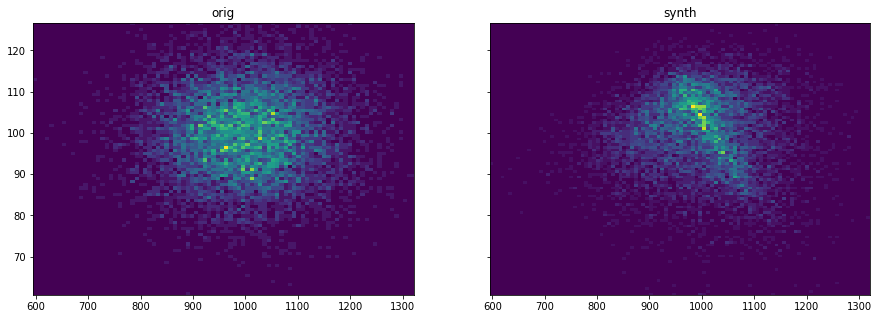

In [10]:
syn_plot.synthesize_and_plot(data, 'ball', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Gauss "ball" around of zero

In [11]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=100, y_mean=0, y_std=10, size=10000)

took 7.450230121612549 s
Metrics:
avg_distance: 0.04624999999999996


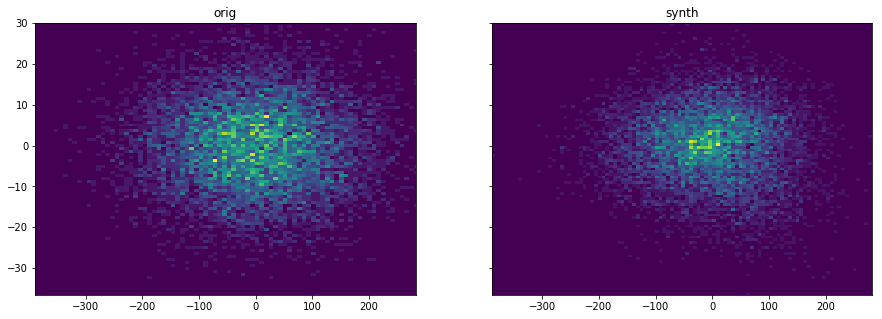

In [12]:
syn_plot.synthesize_and_plot(data, 'ball_ext', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Correlated Gaussian far from zero

In [13]:
data = syn_dist.create_gauss_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000, cor=0.8)

took 7.470442056655884 s
Metrics:
avg_distance: 0.06059999999999999
max_correlation_distance: 0.09984268580662325


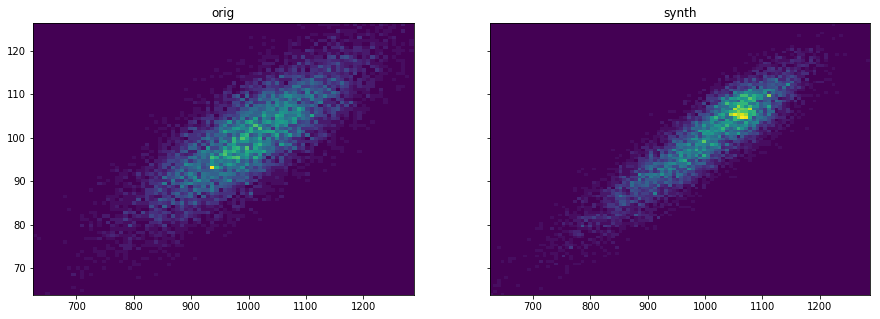

In [14]:
metrics = dict(eval_utils.default_metrics)
metrics["max_correlation_distance"] = eval_utils.max_correlation_distance
syn_plot.synthesize_and_plot(data, 'corr_ball_far', evaluation=evaluation, metrics=metrics, 
                             config=config)

### Correlated Gaussian around zero

In [15]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=100, y_mean=0, y_std=10, size=10000, cor=0.8)

took 7.355546236038208 s
Metrics:
avg_distance: 0.06109999999999999
max_correlation_distance: 0.11058181354038754


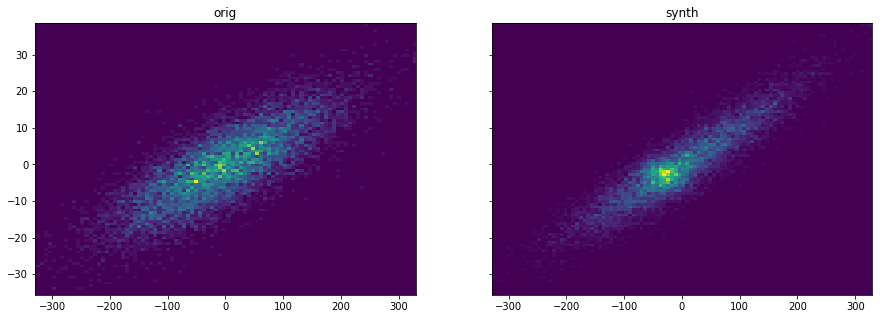

In [16]:
metrics = dict(eval_utils.default_metrics)
metrics["max_correlation_distance"] = eval_utils.max_correlation_distance
syn_plot.synthesize_and_plot(data, 'corr_ball_zero', evaluation=evaluation, metrics=metrics, 
                             config=config)

### Line of noise that far from zero

In [17]:
data = syn_dist.create_line(x_range=(0, 1000), intercept=100, slope=-0.1, y_std=10, size=10000)

took 7.782526969909668 s
Metrics:
avg_distance: 0.07215000000000005


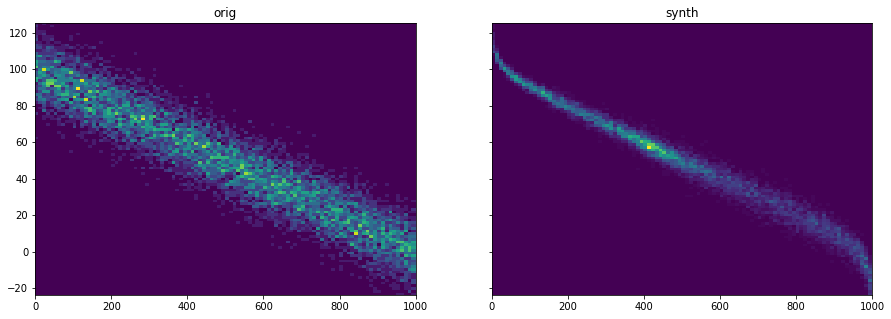

In [18]:
syn_plot.synthesize_and_plot(data, 'line', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Line of noise that comes from zero

In [19]:
data = syn_dist.create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)

took 7.802095890045166 s
Metrics:
avg_distance: 0.06340000000000001


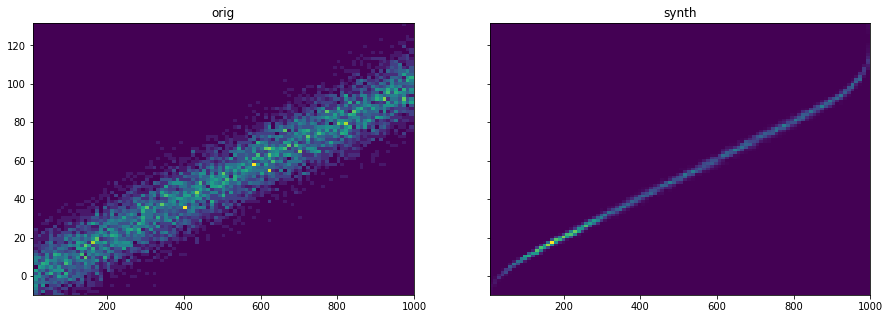

In [20]:
syn_plot.synthesize_and_plot(data, 'line_ext', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Power law distribution

In [21]:
data = syn_dist.create_power_law_distribution(shape=0.5, scale=1000, size=10000)

took 8.554330110549927 s


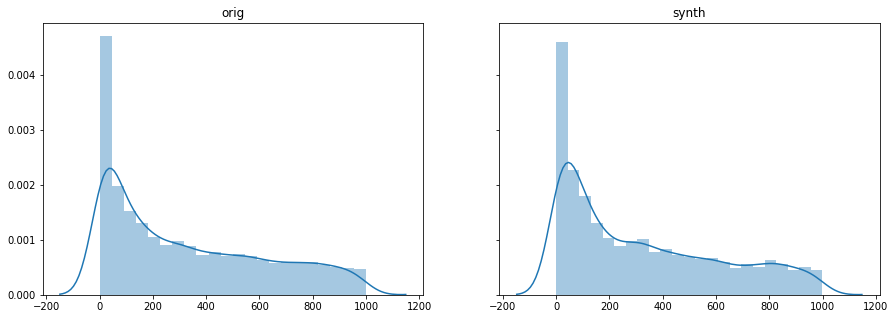

In [22]:
syn_plot.synthesize_and_plot(data, 'power_law', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Conditional distribution

In [23]:
data = syn_dist.create_conditional_distribution((10,2), (20, 5), (30, 1), size=10000)

took 8.710633993148804 s


ValueError: color kwarg must have one color per data set. 2 data sets and 1 colors were provided

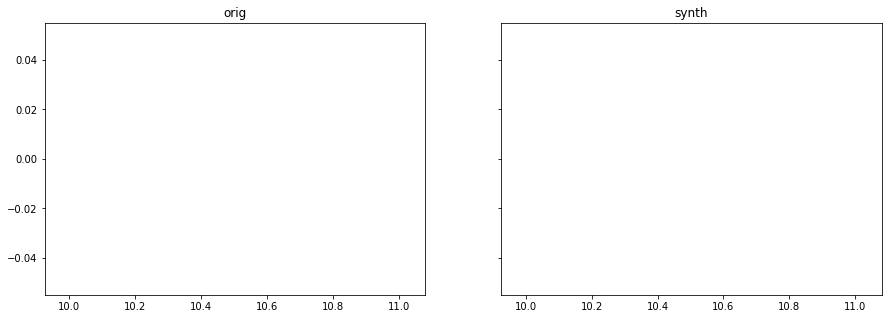

In [24]:
syn_plot.synthesize_and_plot(data, 'conditional', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Bernoulli distribution

In [25]:
data = syn_dist.create_bernoulli(probability=0.5, size=10000)

took 8.292696714401245 s


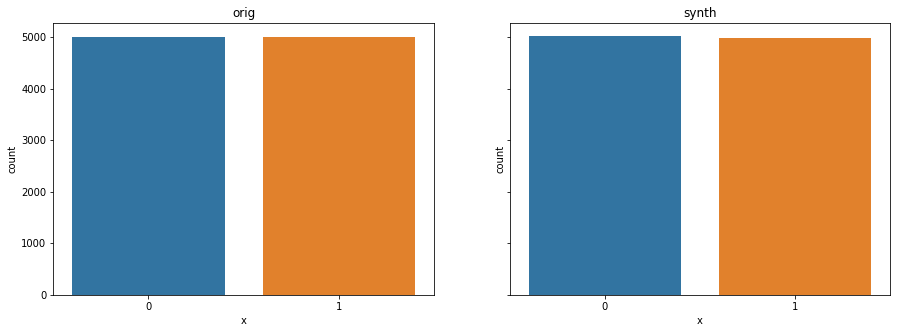

In [28]:
syn_plot.synthesize_and_plot(data, 'bernoulli_50/50', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

In [29]:
data = syn_dist.create_bernoulli(probability=0.2, size=10000)

took 8.062379121780396 s


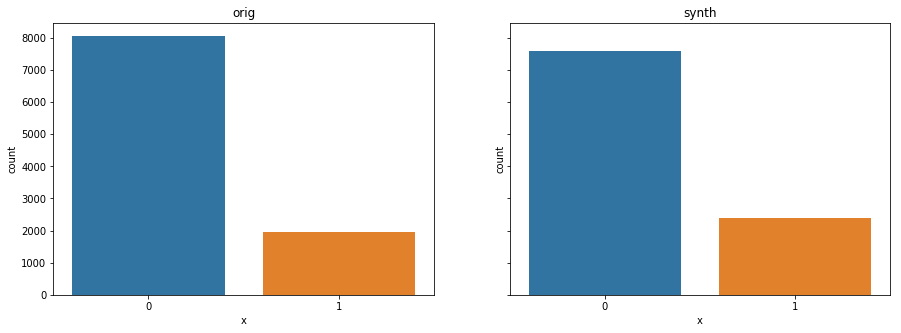

In [30]:
syn_plot.synthesize_and_plot(data, 'bernoulli_20/80', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

### Categorical distribution

In [52]:
data = syn_dist.create_uniform_categorical(n_classes=100, size=100000)

took 43.56436777114868 s


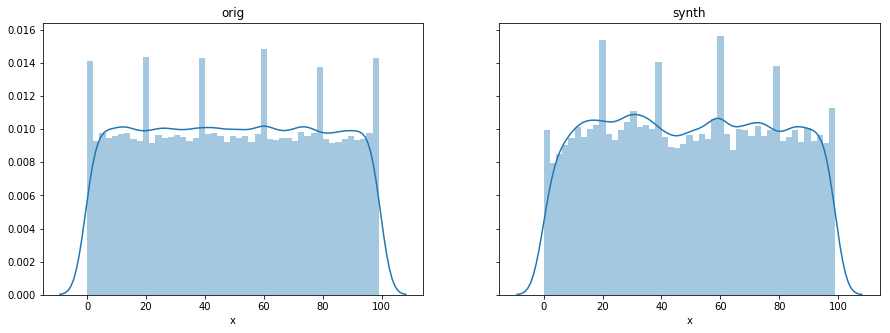

In [53]:
syn_plot.synthesize_and_plot(data, 'categorical_uniform', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

In [33]:
data = syn_dist.create_power_law_categorical(n_classes=10, size=10000)

took 8.089760780334473 s


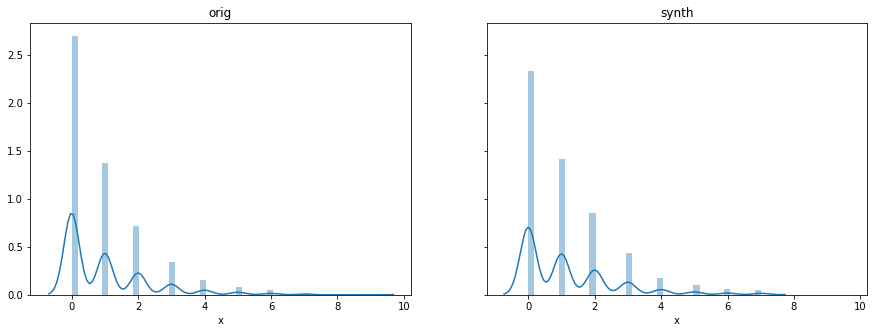

In [34]:
syn_plot.synthesize_and_plot(data, 'categorical_powerlaw', evaluation=evaluation, metrics=eval_utils.default_metrics, 
                             config=config)

In [35]:
data = syn_dist.create_mixed_continuous_categorical(n_classes=10, size=10000)

took 8.225680828094482 s


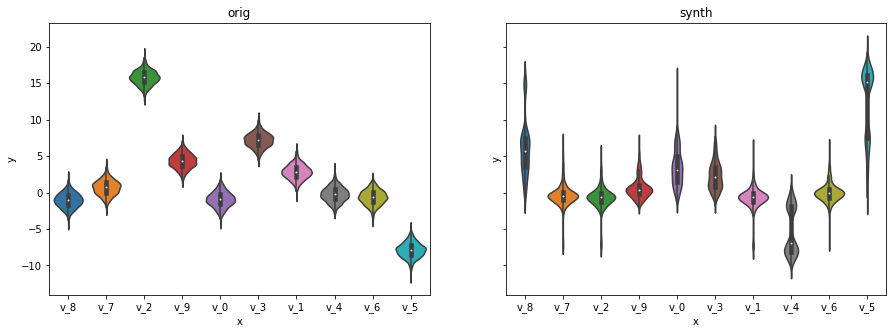

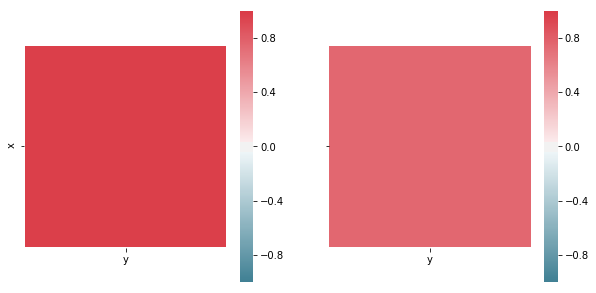

In [36]:
syn_plot.synthesize_and_plot(data, 'mixed_categorical_continuous', evaluation=evaluation,
                             metrics=eval_utils.default_metrics, config=config, show_anova=True)

In [37]:
data = syn_dist.create_correlated_categorical(n_classes=10, size=10000, sd=1.)

took 8.996958017349243 s
         Current function value: 1.916201
         Iterations: 35
         Function evaluations: 111
         Gradient evaluations: 111


/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 2.106872
         Iterations: 35
         Function evaluations: 113
         Gradient evaluations: 113


/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


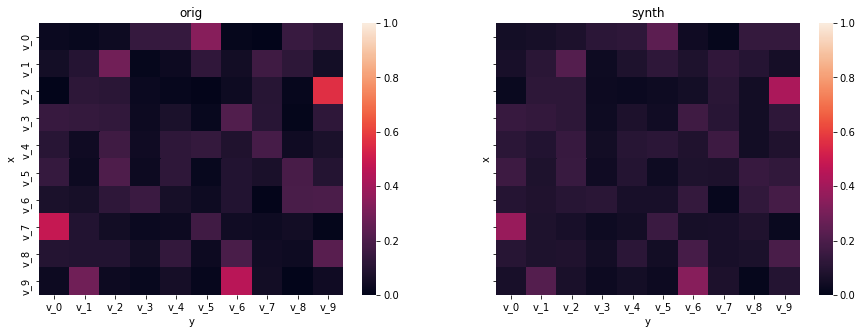

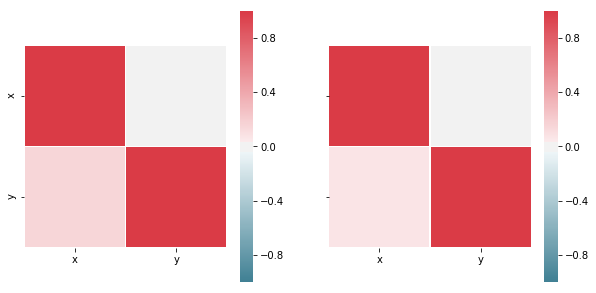

In [38]:
syn_plot.synthesize_and_plot(data, 'correlated_categoricals', evaluation=evaluation,
                             metrics=eval_utils.default_metrics, config=config, show_cat_rsquared=True)

In [53]:
data = syn_dist.create_multidimensional_categorical(dimensions=50, n_classes=10, size=10000)

took 48.84287190437317 s
Metrics:
avg_distance: 0.062572


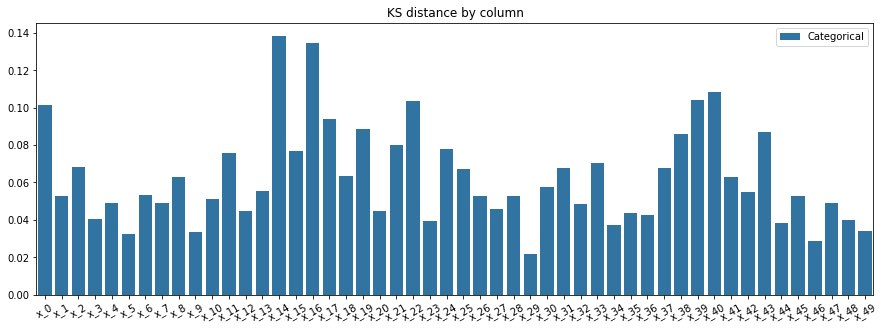

In [54]:
syn_plot.synthesize_and_plot(data, 'multidimensional_categorical', evaluation=evaluation, 
                             metrics=eval_utils.default_metrics, config=config)

In [55]:
data = syn_dist.create_multidimensional_correlated_categorical(dimensions=50, n_classes=10, size=10000)

took 47.477123737335205 s
Metrics:
avg_distance: 0.09489800000000001


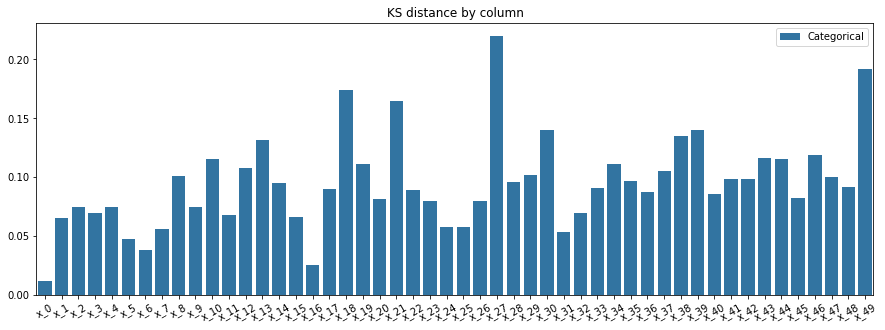

In [56]:
syn_plot.synthesize_and_plot(data, 'multidimensional_correlated_categorical', evaluation=evaluation,
                             metrics=eval_utils.default_metrics, config=config)

In [57]:
data = syn_dist.create_multidimensional_mixed(categorical_dim=25, continuous_dim=25, n_classes=10, size=10000)

took 35.4368360042572 s
Metrics:
avg_distance: 0.11350000000000003


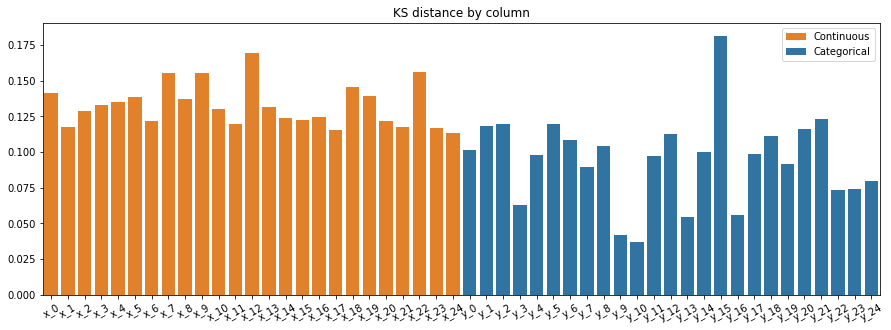

In [58]:
syn_plot.synthesize_and_plot(data, 'multidimensional_mixed', evaluation=evaluation,
                             metrics=eval_utils.default_metrics, config=config)

In [59]:
data = syn_dist.create_multidimensional_correlated_mixed(categorical_dim=25, continuous_dim=25, n_classes=10, 
                                                         size=10000, categorical_sd=0.1, cont_sd=0.1, prior_sd=0.5)

took 35.45924401283264 s
Metrics:
avg_distance: 0.14989


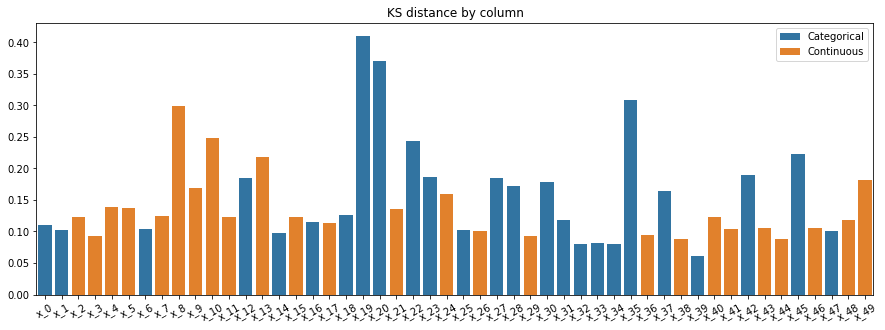

In [60]:
syn_plot.synthesize_and_plot(data, 'multidimensional_correlated_mixed', evaluation=evaluation,
                             metrics=eval_utils.default_metrics, config=config)

### Time-series
#### Continuous

In [83]:
data = syn_dist.create_time_series_data(func=syn_dist.additive_sine(a=10, p=1000, sd=2), length=10000)

took 14.153533935546875 s
Metrics:
avg_distance: 0.18825
max_acf_distance: 0.9397816680617839
max_pacf_distance: 0.9316323045771137
mean_squared_error: 6.65619496485126


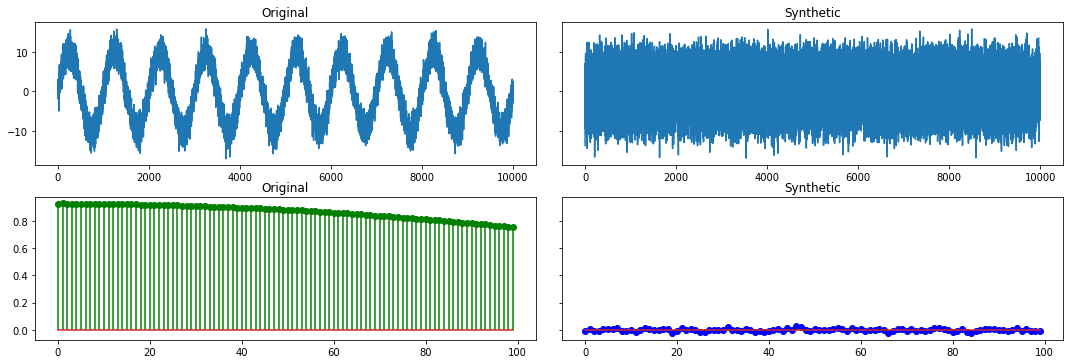

In [84]:
metrics = dict(eval_utils.default_metrics)
metrics["max_acf_distance"] = eval_utils.max_autocorrelation_distance
metrics["max_pacf_distance"] = eval_utils.max_partial_autocorrelation_distance
metrics["mean_squared_error"] = eval_utils.mean_squared_error_closure(col="x", baseline=2**4)
syn_plot.synthesize_and_plot(data, "sine_additive_noise", evaluation=evaluation,
                             metrics=metrics, config=config, time_series=True,
                             max_lag=100)

#### Categorical

In [80]:
data = syn_dist.create_time_series_data(func=syn_dist.categorical_auto_regressive(n_classes=10, sd=2), length=10000)

took 16.16905903816223 s
Metrics:
avg_distance: 0.1971


/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


max_auto_association_distance: 0.9997237606007571


/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amandlamabona/anaconda3/envs/synth_p37/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amandlamabona/anaconda3/envs/synth_p37/li

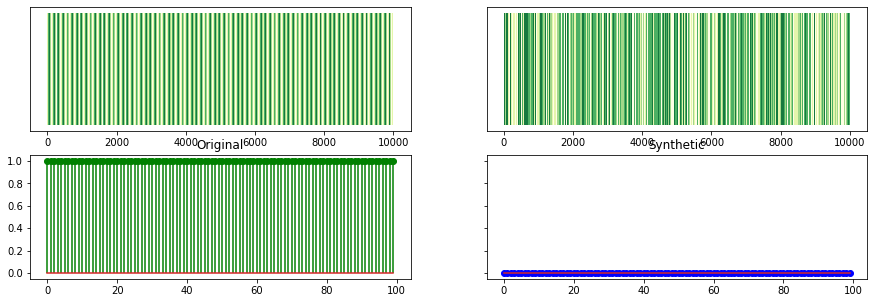

In [81]:
metrics = dict(eval_utils.default_metrics)
metrics["max_auto_association_distance"] = eval_utils.max_categorical_auto_association_distance
syn_plot.synthesize_and_plot(data, "first_order_markov", evaluation=evaluation,
                             metrics=metrics, config=config, time_series=True,
                             max_lag=100)

In [68]:
evaluation.write_metrics()